#  **Final Project - Demographic Analysis of the Academy Award Nominations**
*Notebook II*

The Academy Award Demographics dataset - Explanatory Data Analysis

---

> Authors: Sara Kartalovic, Bogdan Milovanovic,  Tarja Savonen<br>
> Date: 19/01/2022 <br>
> Course : Network Science <br>
> Teacher : Tomaso Erseghe <br>
> Co-Teachers : Lejla Dzanko

In [1]:
# Imports

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.pyplot import figure

import itertools
import networkx as nx

In [2]:
# Mount Google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

In [6]:
demographics = pd.read_csv('/content/drive/MyDrive/NS/Original Filtered Data/Oscars-demographics-DFE.csv')

In [7]:
demographics = demographics.replace('Na', np.nan)

In [8]:
usa_eng_df = demographics.loc[(demographics['birthplace'] == 'England') | (demographics['birthplace'] == 'USA')]
usa_eng = usa_eng_df['birthplace']
for country in demographics['birthplace']:
  if country != 'USA':
    if country != 'England':
      demographics['birthplace'] = demographics['birthplace'].replace(country, 'Other')

usa_eng_df = demographics.loc[(demographics['sexual_orientation'] == 'Lesbian') | (demographics['sexual_orientation'] == 'Gay')]
usa_eng = usa_eng_df['sexual_orientation']
for country in demographics['sexual_orientation']:
  if country != 'Straight':
    if country != 'Bisexual':
      demographics['sexual_orientation'] = demographics['sexual_orientation'].replace(country, 'Gay/Lesbian')

In [9]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year_of_award       441 non-null    int64 
 1   award               441 non-null    object
 2   movie               441 non-null    object
 3   person              441 non-null    object
 4   birthplace          441 non-null    object
 5   date_of_birth       441 non-null    object
 6   race_ethnicity      441 non-null    object
 7   sexual_orientation  441 non-null    object
 8   religion            172 non-null    object
dtypes: int64(1), object(8)
memory usage: 31.1+ KB


In [10]:
del demographics['religion']
demographics = demographics.dropna()
demographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 440
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year_of_award       441 non-null    int64 
 1   award               441 non-null    object
 2   movie               441 non-null    object
 3   person              441 non-null    object
 4   birthplace          441 non-null    object
 5   date_of_birth       441 non-null    object
 6   race_ethnicity      441 non-null    object
 7   sexual_orientation  441 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.0+ KB


# Explanatory Data Analysis (EDA)

## Birthplace

In [11]:
unique_people = {}

for idx, row in demographics.iterrows():
  people = [row['birthplace']]
  for person in people:
    if people != '0':
      unique_people.setdefault(person,0)
      unique_people[person] += 1

up_df = pd.DataFrame.from_dict(unique_people, orient='index').reset_index()
up_df.rename(columns = {'index':'Company', 0:'Count'}, inplace=True)

([<matplotlib.axis.YTick at 0x7f95bfa1f650>,
 [Text(0, 0, 'USA'), Text(0, 0, 'Other'), Text(0, 0, 'England')])

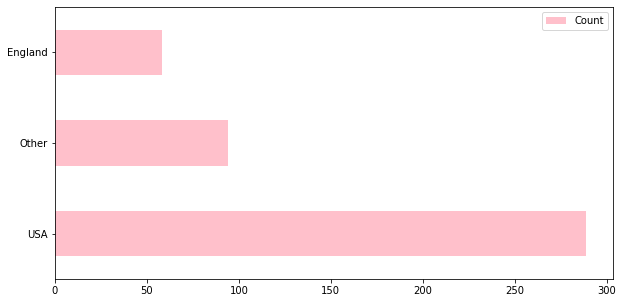

In [19]:
birthplace = {}

for idx, row in demographics.iterrows():
#for row in oscar.film:
  places = [row['birthplace']]
  for place in places:
    #if the word is encountered for the first time add to dict as key and set its value to 0
    birthplace.setdefault(place,0)
    #increase the value (i.e the count) of the word by 1 every time it is encountered
    birthplace[place] += 1

birthplace_df = pd.DataFrame.from_dict(birthplace, orient='index').reset_index()
birthplace_df.rename(columns = {'index' : 'Country', 0:'Count'}, inplace=True)
birthplace_df.sort_values(by=['Count'], ascending=False, inplace=True)

birthplace_plot = birthplace_df.plot.barh(figsize=(10, 5),color = 'pink')
labels = birthplace_df["Country"]
label = list(labels)
# Change x-axis labels
locs, labels = plt.yticks()
plt.yticks(locs,label)

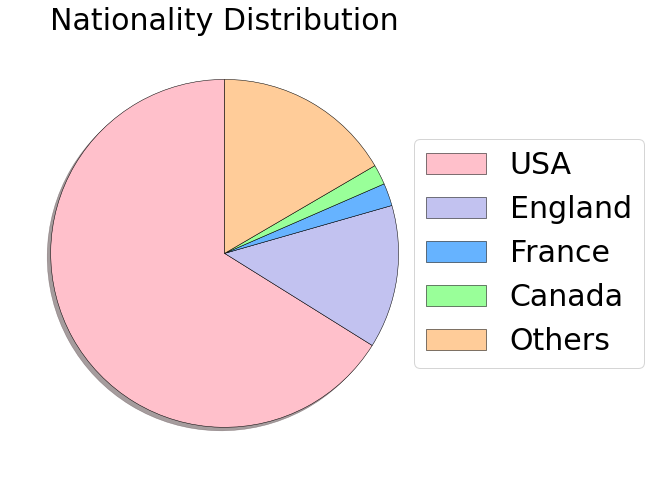

In [20]:
# Creating dataset
orients = ['USA','England','France','Canada','Others']
data = [283, 57, 9, 8, 71]
 
# Creating color parameters
colors = ("pink", '#c2c2f0', '#66b3ff','#99ff99','#ffcc99', 'deepskyblue')

# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "black" }
 
# Creating plot
fig, ax = plt.subplots(figsize =(8, 8))
wedges, texts = ax.pie(data,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, orients,
          loc ="center left",
          bbox_to_anchor =(0.9, 0, 0.5, 1),
          prop={'size': 30})
 
ax.set_title("Nationality Distribution", fontsize=30)
 
# show plot
plt.show()

## Race Ethnicity

In [21]:
unique_people = {}

for idx, row in demographics.iterrows():
  people = [row['race_ethnicity']]
  for person in people:
    if people != '0':
      unique_people.setdefault(person,0)
      unique_people[person] += 1

up_df = pd.DataFrame.from_dict(unique_people, orient='index').reset_index()
up_df.rename(columns = {'index':'Company', 0:'Count'}, inplace=True)

([<matplotlib.axis.YTick at 0x7f95bf091350>,
 [Text(0, 0, 'White'),
  Text(0, 0, 'Black'),
  Text(0, 0, 'Hispanic'),
  Text(0, 0, 'Asian'),
  Text(0, 0, 'Multiracial'),
  Text(0, 0, 'Middle Eastern')])

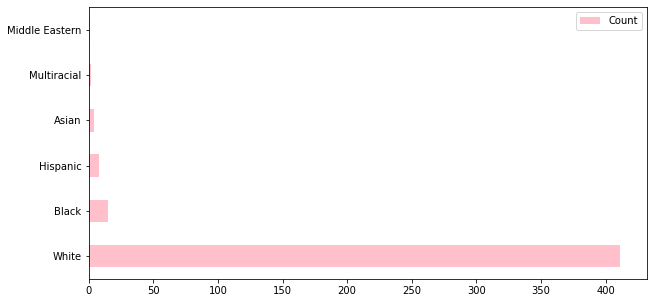

In [22]:
races = {}

for idx, row in demographics.iterrows():
#for row in oscar.film:
  race = [row['race_ethnicity']]
  for r in race:
    #if the word is encountered for the first time add to dict as key and set its value to 0
    races.setdefault(r,0)
    #increase the value (i.e the count) of the word by 1 every time it is encountered
    races[r] += 1


race_df = pd.DataFrame.from_dict(races, orient='index').reset_index()
race_df.rename(columns = {'index' : 'Race', 0:'Count'}, inplace=True)
race_df.sort_values(by=['Count'], ascending=False, inplace=True)

race_plot = race_df.plot.barh(figsize=(10, 5),color = 'pink')
labels = race_df["Race"]
label = list(labels)
# Change x-axis labels
locs, labels = plt.yticks()
plt.yticks(locs,label)

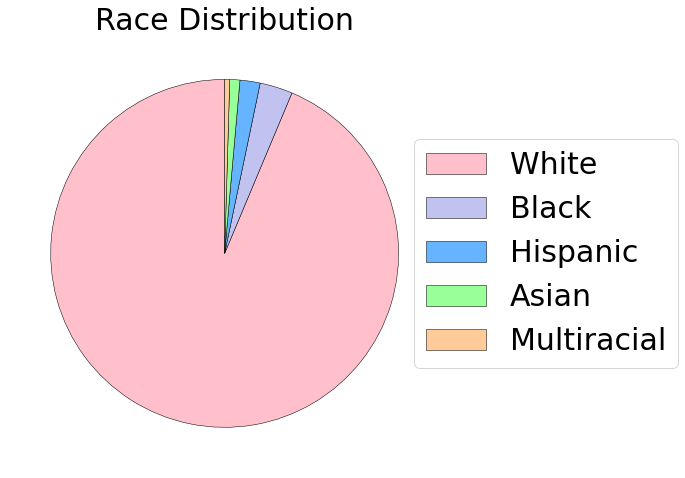

In [23]:
# Creating dataset
orients = ['White','Black','Hispanic','Asian','Multiracial']
 
data = [400, 13, 8, 4, 2]
 
# Creating color parameters
colors = ("pink", '#c2c2f0', '#66b3ff','#99ff99','#ffcc99', 'deepskyblue')

# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "black" }
 
# Creating plot
fig, ax = plt.subplots(figsize =(8, 8))
wedges, texts = ax.pie(data, 
                      labeldistance=2,
                      colors = colors,
                      startangle = 90,
                      wedgeprops = wp)
 
# Adding legend
ax.legend(wedges, orients,
          loc ="center left",
          bbox_to_anchor =(0.9, 0, 0.5, 1),
          prop={'size': 30})
 
ax.set_title("Race Distribution", fontsize=30)
 
# show plot
plt.show()

## Sexual Orientation

In [24]:
unique_people = {}

for idx, row in demographics.iterrows():
  people = [row['sexual_orientation']]
  for person in people:
    if people != '0':
      unique_people.setdefault(person,0)
      unique_people[person] += 1

up_df = pd.DataFrame.from_dict(unique_people, orient='index').reset_index()
up_df.rename(columns = {'index':'Company', 0:'Count'}, inplace=True)
up_df

,Company,Count
0,Straight,397
1,Bisexual,21
2,Gay/Lesbian,23


([<matplotlib.axis.YTick at 0x7f95bf1fcc50>,
 [Text(0, 0, 'Straight'), Text(0, 0, 'Gay/Lesbian'), Text(0, 0, 'Bisexual')])

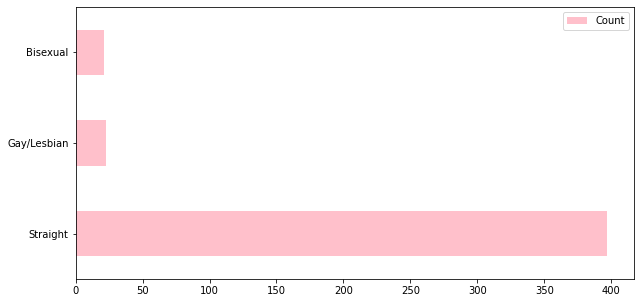

In [25]:
orientations = {}

for idx, row in demographics.iterrows():
#for row in oscar.film:
  orientation = [row['sexual_orientation']]
  for o in orientation:
    #if the word is encountered for the first time add to dict as key and set its value to 0
    orientations.setdefault(o,0)
    #increase the value (i.e the count) of the word by 1 every time it is encountered
    orientations[o] += 1


orientations_df = pd.DataFrame.from_dict(orientations, orient='index').reset_index()
orientations_df.rename(columns = {'index' : 'Sexual Orientation', 0:'Count'}, inplace=True)
orientations_df.sort_values(by=['Count'], ascending=False, inplace=True)


orientation_plot = orientations_df.plot.barh(figsize=(10, 5),color = 'pink')
labels = orientations_df['Sexual Orientation']
label = list(labels)
# Change x-axis labels
locs, labels = plt.yticks()
plt.yticks(locs,label)

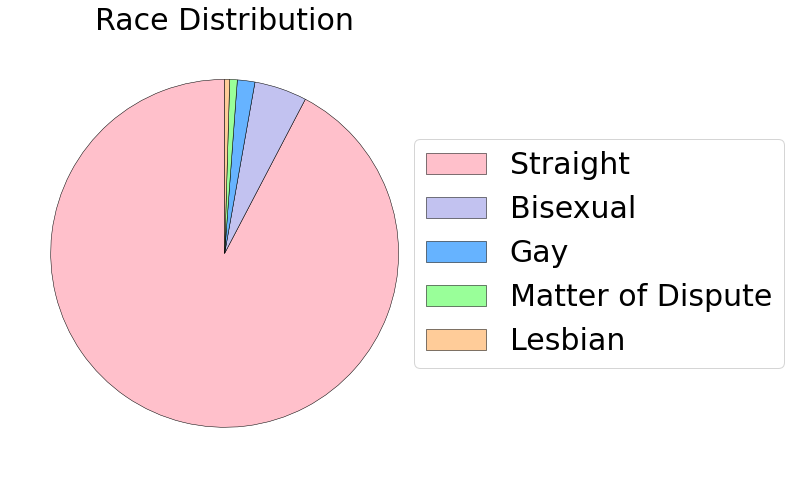

In [26]:
# Creating dataset
orients = ['Straight','Bisexual','Gay','Matter of Dispute','Lesbian']
 
data = [397, 21, 7, 3, 2]
 
# Creating color parameters
colors = ("pink", '#c2c2f0', '#66b3ff','#99ff99','#ffcc99', 'deepskyblue')

# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "black" }
 
# Creating plot
fig, ax = plt.subplots(figsize =(8, 8))
wedges, texts = ax.pie(data, 
                      labeldistance=2,
                      colors = colors,
                      startangle = 90,
                      wedgeprops = wp)
 
# Adding legend
ax.legend(wedges, orients,
          loc ="center left",
          bbox_to_anchor =(0.9, 0, 0.5, 1),
          prop={'size': 30})
 
ax.set_title("Race Distribution", fontsize=30)
 
# show plot
plt.show()